### Importing Warnings

In [2]:
#import the warnings.

import warnings

warnings.filterwarnings('ignore')

In [3]:
#import the useful libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 200)
#pd.set_option('display.max_rows', 200)

### Reading the Application Data provided

In [4]:
# Reading the "application_data" csv file

inp0 = pd.read_csv("application_data.csv")                        

In [5]:
# Printing the Head of inp0 dataframe

inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
# Shape of inp0 dataframe

inp0.shape            

(307511, 122)

In [7]:
# Checking which columns are categorical and which are continuous. 

inp0.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY         2
FLAG_DOCUMENT_18                2
FLAG_DOCUMENT_14                2
FLAG_MOBIL                      2
FLAG_EMP_PHONE                  2
                            ...  
DAYS_REGISTRATION           15688
DAYS_BIRTH                  17460
EXT_SOURCE_1               114584
EXT_SOURCE_2               119831
SK_ID_CURR                 307511
Length: 122, dtype: int64

In [8]:
# Info of inp0 dataframe

inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
# Describe of inp0 dataframe

inp0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [10]:
# Printing the datatype of inp0 dataframe

inp0.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [11]:
# Checking the number of null values in inp0 dataframe

inp0.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

# Cleaning the Missing Values

In [12]:
# Checking the no. of null value columns that are equal to or more than 50%

col = inp0.isnull().sum()
col = col[col.values>=(0.5*len(col))]
len(col)

64

In [13]:
# Dropping all those columns that had null values that were equal to or more than 50%

col = list(col[col.values>=0.5].index)
inp0.drop(labels = col, axis=1, inplace = True)
len(col)

64

In [14]:
# Checking the shape of inp0 dataframe after dropping the columns

inp0.shape

(307511, 58)

In [15]:
# Checking the percentage of null value columns

(inp0.isnull().sum()/len(inp0))*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


###### So, "AMT_ANNUITY" column is having very few null values rows. So, we will fill those missing values with median values.

In [16]:
# Finding the median of "AMT_ANNUITY" in inp0 dataframe

median = inp0["AMT_ANNUITY"].median()
median

24903.0

In [17]:
# Filling the missing values in "AMT_ANNUITY" column with median values.

inp0["AMT_ANNUITY"].fillna(median, inplace = True)
inp0["AMT_ANNUITY"]

0         24700.5
1         35698.5
2          6750.0
3         29686.5
4         21865.5
           ...   
307506    27558.0
307507    12001.5
307508    29979.0
307509    20205.0
307510    49117.5
Name: AMT_ANNUITY, Length: 307511, dtype: float64

In [18]:
# Checking if any column has null values

inp0.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

###### Now, majority of columns are not having any null values in them. 

In [19]:
# Checking the no. of null value rows that are equal to or more than 50%

col1 = inp0.isnull().sum(axis=1)
col1 = col1[col1.values>=(0.5*len(inp0))]
len(col1)

0

In [20]:
#  Dropping all those rows that had null values that were equal to or more than 40%

col1 = list(col1[col1.values>=(0.5*len(inp0))].index)
inp0.drop(labels=col1, axis=0,inplace=True)
len(col1)

0

In [21]:
# Checking the shape of inp0 dataframe after dropping the rows

inp0.shape

(307511, 58)

In [22]:
# Removing all the columns that are not necessary from inp0 dataset

col2 = ["FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY",
      "FLAG_EMAIL", "CNT_FAM_MEMBERS", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "DAYS_LAST_PHONE_CHANGE", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", 
      "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", 
      "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", 
      "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21"]

inp0.drop(labels = col2, axis = 1, inplace = True)

In [23]:
# Shape of inp0 dataframe after dropping all the unwanted columns

inp0.shape

(307511, 28)

###### There are some columns that are having "XNA" which means "Not Availabale". So, we will find them and either replace those values or delete them

###### Finding the columns having "XNA" values in them 

In [24]:
# For "CODE_GENDER" column

inp0[inp0["CODE_GENDER"]=="XNA"]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,Working,Secondary / secondary special,Married,Municipal apartment,0.020713,-20232,-10044,-10024.0,-3537,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13717,-2797,-2241.0,-4659,FRIDAY,16,0,0,0,0,0,0,Industry: type 3
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,Working,Higher education,Married,House / apartment,0.035792,-10647,-1228,-183.0,-1671,THURSDAY,15,0,0,0,0,0,0,Kindergarten
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,Commercial associate,Incomplete higher,Civil marriage,House / apartment,0.035792,-9649,-2293,-4099.0,-2326,FRIDAY,15,0,0,0,0,0,0,Medicine


###### In "CODE_GENDER" column, there are 4 rows containing "XNA" values

In [25]:
# For "ORGANISATION_TYPE" column

inp0[inp0["ORGANIZATION_TYPE"]=="XNA"]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,WEDNESDAY,14,0,0,0,0,0,0,XNA
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,-20417,365243,-5246.0,-2512,FRIDAY,7,0,0,0,0,0,0,XNA
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,-24827,365243,-9012.0,-3684,FRIDAY,12,0,0,0,0,0,0,XNA
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,Pensioner,Secondary / secondary special,Married,House / apartment,0.006207,-23920,365243,-9817.0,-4969,FRIDAY,11,0,0,0,0,0,0,XNA
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,Pensioner,Higher education,Single / not married,House / apartment,0.010966,-23548,365243,-5745.0,-4576,WEDNESDAY,9,0,0,0,0,0,0,XNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.031329,-22414,365243,-11976.0,-4171,MONDAY,15,0,0,0,0,0,0,XNA
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,Pensioner,Secondary / secondary special,Separated,House / apartment,0.007330,-24911,365243,-11211.0,-4213,MONDAY,12,0,0,0,0,0,0,XNA
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.010147,-23125,365243,-5485.0,-4115,WEDNESDAY,10,0,0,0,0,0,0,XNA
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.022800,-24384,365243,-7369.0,-2357,MONDAY,15,0,0,0,0,0,0,XNA


###### In "ORGANIZATION_TYPE" column, there are 55374 rows having "XNA" values

In [26]:
# So, now we will check the percentage of genders in the "CODE_GENDER" column

inp0["CODE_GENDER"].value_counts(normalize=True)

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

###### So, we can say that the females are having a majority. As there are only 4 rows of "XNA" values, so we can drop them as this would not impact the dataset. 

In [27]:
# Updating the "CODE_GENDER" column

inp0.drop(inp0.loc[inp0["CODE_GENDER"]=="XNA"].index, inplace = True)
inp0["CODE_GENDER"].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [28]:
# Now, we will value_counts() the "ORGANIZATION_TYPE" column

inp0["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

###### In "ORGANIZATION_TYPE" column, there are a 55374 rows filled with "XNA" values. So, if we drop these values, it would not affect the dataset

In [29]:
# Checking the shape of inp0 dataframe before dropping the "XNA" values from the "ORGANIZATION_TYPE" column

inp0.shape

(307507, 28)

In [30]:
# Dropping the 55374 rows from the "ORGANIZATION_TYPE" column

inp0.drop(inp0.loc[inp0["ORGANIZATION_TYPE"]=="XNA"].index, inplace=True)

In [31]:
# Checking the shape of inp0 dataframe after dropping the "XNA" values from the "ORGANIZATION_TYPE" column

inp0.shape

(252133, 28)

In [32]:
# Checking the data types of all the columns in inp0 dataframe after dropping values if they have been changed

inp0.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_LIVE_CITY           int64
REG_CITY_NOT_WORK_CITY   

In [33]:
# Changing all variable columns into numeric data types in inp0 dataset

inp0["TARGET"] = pd.to_numeric(inp0["TARGET"])
inp0["CNT_CHILDREN"] = pd.to_numeric(inp0["CNT_CHILDREN"])
inp0["AMT_INCOME_TOTAL"] = pd.to_numeric(inp0["AMT_INCOME_TOTAL"])
inp0["AMT_CREDIT"] = pd.to_numeric(inp0["AMT_CREDIT"])
inp0["AMT_ANNUITY"] = pd.to_numeric(inp0["AMT_ANNUITY"])
inp0["REGION_POPULATION_RELATIVE"] = pd.to_numeric(inp0["REGION_POPULATION_RELATIVE"])
inp0["DAYS_BIRTH"] = pd.to_numeric(inp0["DAYS_BIRTH"])
inp0["DAYS_EMPLOYED"] = pd.to_numeric(inp0["DAYS_EMPLOYED"])
inp0["DAYS_REGISTRATION"] = pd.to_numeric(inp0["DAYS_REGISTRATION"])
inp0["DAYS_ID_PUBLISH"] = pd.to_numeric(inp0["DAYS_ID_PUBLISH"])
inp0["HOUR_APPR_PROCESS_START"] = pd.to_numeric(inp0["HOUR_APPR_PROCESS_START"])
inp0["LIVE_REGION_NOT_WORK_REGION"] = pd.to_numeric(inp0["LIVE_REGION_NOT_WORK_REGION"])
inp0["REG_CITY_NOT_LIVE_CITY"] = pd.to_numeric(inp0["REG_CITY_NOT_LIVE_CITY"])
inp0["REG_CITY_NOT_WORK_CITY"] = pd.to_numeric(inp0["REG_CITY_NOT_WORK_CITY"])
inp0["LIVE_CITY_NOT_WORK_CITY"] = pd.to_numeric(inp0["LIVE_CITY_NOT_WORK_CITY"])

inp0.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_LIVE_CITY           int64
REG_CITY_NOT_WORK_CITY   

In [34]:
# Segregating TARGET=0 in target_0 and TARGET=1 in target_1 repectively

target_0 = inp0.loc[inp0["TARGET"]==0]
target_1 = inp0.loc[inp0["TARGET"]==1]

In [35]:
# Checking if it is segregated properly

target_0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,THURSDAY,11,0,0,0,0,1,1,Religion
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,WEDNESDAY,16,0,0,0,0,0,0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307503,456247,0,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,Commercial associate,Higher education,Single / not married,House / apartment,0.022800,-11870,-399,-675.0,-3936,SATURDAY,11,0,0,0,0,0,0,Bank
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,Working,Secondary / secondary special,Separated,House / apartment,0.022625,-16705,-7258,-9798.0,-259,WEDNESDAY,11,0,0,0,0,0,0,Self-employed
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,THURSDAY,15,0,0,0,0,0,0,Services
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,THURSDAY,9,0,0,0,0,1,1,School


In [36]:
target_1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,THURSDAY,11,0,0,0,0,0,0,Self-employed
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,-10199,-2015,-4802.0,-1038,SUNDAY,13,0,0,0,0,1,1,Industry: type 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,N,N,1,207000.0,450000.0,32746.5,Working,Secondary / secondary special,Married,House / apartment,0.020246,-9918,-3048,-8507.0,-2580,MONDAY,16,0,0,0,0,0,0,Business Entity Type 3
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,Working,Higher education,Civil marriage,House / apartment,0.007330,-13416,-2405,-500.0,-4704,THURSDAY,13,0,0,0,0,0,0,Construction
307481,456225,1,Cash loans,M,N,Y,0,225000.0,297000.0,19975.5,Working,Secondary / secondary special,Married,House / apartment,0.008575,-20644,-3147,-8921.0,-3832,FRIDAY,15,0,0,0,0,0,0,Business Entity Type 3
307489,456233,1,Cash loans,F,N,Y,0,225000.0,521280.0,23089.5,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.014464,-16471,-286,-8291.0,-9,FRIDAY,5,0,0,0,0,0,0,Business Entity Type 3


In [37]:
# Checking the Imbalance Percentage of TARGET column

100*inp0["TARGET"].value_counts(normalize = True)

0    91.339888
1     8.660112
Name: TARGET, dtype: float64

In [38]:
# Checking the value_counts() of the "TARGET" column

inp0["TARGET"].value_counts()

0    230298
1     21835
Name: TARGET, dtype: int64

###### So, we can make out that TARGET=0 (client is able to pay the loan amount) has a majority as compared to TARGET=1

In [39]:
# Now, we are creating buckets for "AMT_INCOME_TOTAL" column

inp0["AMT_INCOME_TOTAL_BUCKETS"] = pd.cut(inp0["AMT_INCOME_TOTAL"], [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 
                           220000, 240000, 260000, 280000, 300000, 320000, 340000, 360000, 380000, 400000, 420000, 440000, 460000, 480000, 500000, 10000000000000],
                           labels = ["0-20,000", "20,000-40,000", "40,000-60,000", "60,000-80,000", "80,000-1,00,000", "1,00,000-1,20,000", "1,20,000-1,40,000", "1,40,000-1,60,000", "1,60,000-1,80,000", "1,80,000-2,00,000",
                                     "2,00,000-2,20,000", "2,20,000-2,40,000", "2,40,000-2,60,000", "2,60,000-2,80,000", "2,80,000-3,00,000", "3,00,000-3,20,000", "3,20,000-3,40,000", "3,40,000-3,60,000", "3,60,000-3,80,000", "3,80,000-4,00,000", 
                                     "4,00,000-4,20,000", "4,20,000-4,40,000", "4,40,000-4,60,000", "4,60,000-4,80,000", "4,80,000-5,00,000", "5,00,000+"])


In [40]:
# Now, we are creating buckets for "AMT_CREDIT" column

inp0["AMT_CREDIT_BUCKETS"] = pd.cut(inp0["AMT_CREDIT"], [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000,
                           1200000, 1300000, 1400000, 1500000, 10000000000000],
                           labels = ["0-1,00,000", "1,00,000-2,00,000", "2,00,000-3,00,000", "3,00,000-4,00,000", "4,00,000-5,00,000", "5,00,000-6,00,000",
                                     "6,00,000-7,00,000", "7,00,000-8,00,000", "8,00,000-9,00,000", "9,00,000-10,00,000", "10,00,000-11,00,000", "11,00,000-12,00,000",
                                     "12,00,000-13,00,000", "13,00,000-14,00,000", "14,00,000-15,00,000", "15,00,000+"])


## For TARGET=0 (Client's able to pay the loans without any difficulty)

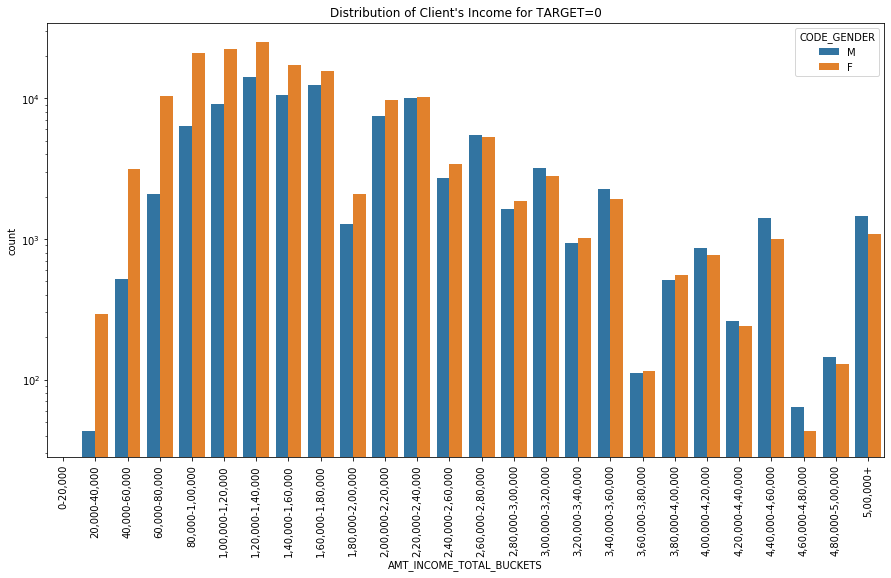

In [41]:
# Countplot for TARGET=0 of Client's Income

fig_dims = (15,8)
fig, ax = plt.subplots(figsize = fig_dims)

plt.xticks(rotation = 90)
plt.yscale("log")
plt.title("Distribution of Client's Income for TARGET=0")
sns.countplot(data = target_0, x = inp0["AMT_INCOME_TOTAL_BUCKETS"], ax = ax, hue = inp0["CODE_GENDER"])
plt.show()

###### 1) Female count is more than the Male count in this graph.
###### 2) Maximum income of people ranges between 1.2 - 1.4 lakhs and in this, majority of the females are earning between this range as compared                  to the males.
###### 3) Very less people earn between 4.6 - 4.8 lakhs.

In [42]:
# Checking the "INCOME_TYPE" column

inp0["NAME_INCOME_TYPE"]

0                      Working
1                State servant
2                      Working
3                      Working
4                      Working
                  ...         
307504                 Working
307506                 Working
307508                 Working
307509    Commercial associate
307510    Commercial associate
Name: NAME_INCOME_TYPE, Length: 252133, dtype: object

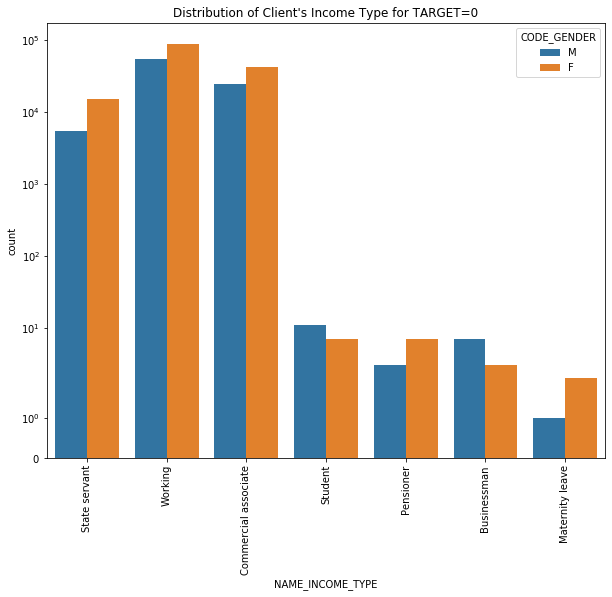

In [43]:
# Plotting "INCOME_TYPE" with "CODE_GENDER" for TARGET=0

fig_dims = (10,8)
fig, ax = plt.subplots(figsize = fig_dims)

plt.xticks(rotation = 90)
plt.yscale("symlog")
plt.title("Distribution of Client's Income Type for TARGET=0")
sns.countplot(target_0["NAME_INCOME_TYPE"], ax = ax, hue = inp0["CODE_GENDER"])
plt.show()

###### So, from the above graph, we can say that-
###### 1) The Working, State Servant and Commercial associates earn the maximum as compared to the others.
###### 2) The Student, Pensioner, Businessman and Maternity leave people earn less.
###### 3) In these categories, the females are the ones who are earning higher than the males.

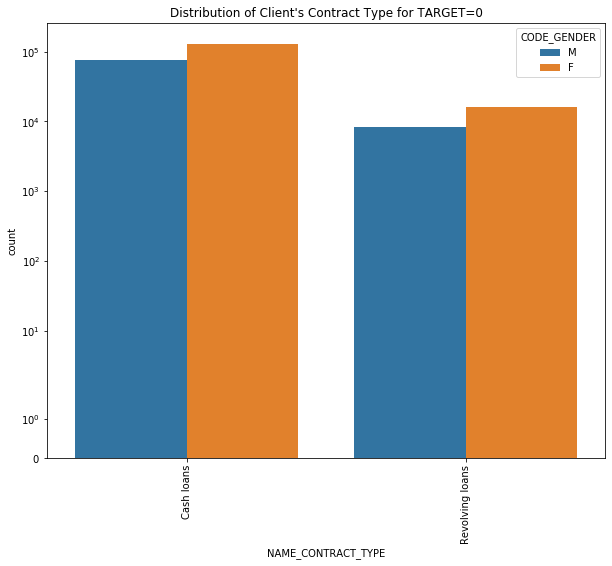

In [44]:
# Plotting the Contract_Type with respect to the Gender for TARGET=0

fig_dims = (10,8)
fig, ax = plt.subplots(figsize = fig_dims)

plt.xticks(rotation = 90)
plt.yscale("symlog")
plt.title("Distribution of Client's Contract Type for TARGET=0")
sns.countplot(target_0["NAME_CONTRACT_TYPE"], ax = ax, hue = inp0["CODE_GENDER"])
plt.show()

###### 1) In the above graph, we can clearly see that Contract Type : Cash Loans are having higher number of people as compared to that of 
######     Contract Type : Revolving Loans
###### 2) In both these Contract Types, Females are the majority than the males.

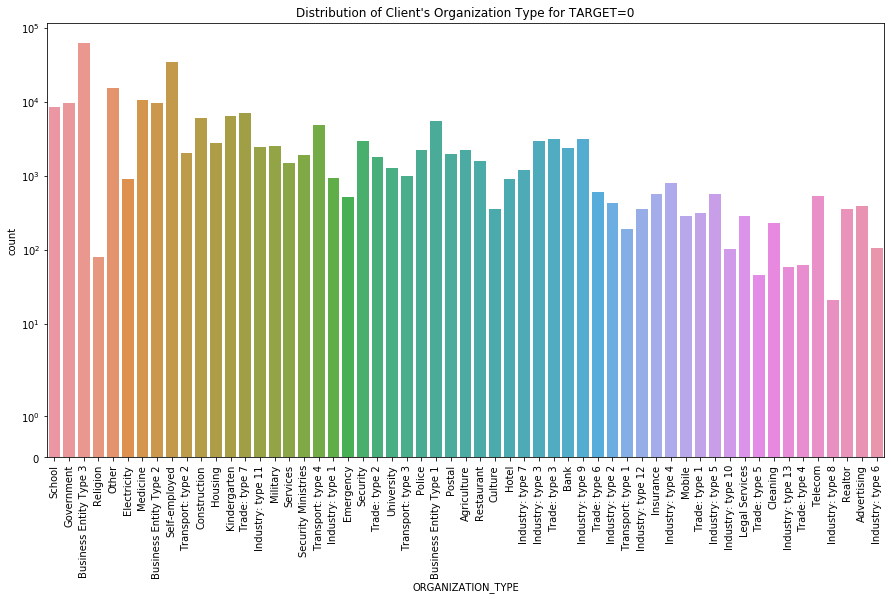

In [45]:
# Plotting the Organization_type for TARGET=0

fig_dims = (15,8)
fig, ax = plt.subplots(figsize = fig_dims)

plt.xticks(rotation = 90)
plt.yscale("symlog")
plt.title("Distribution of Client's Organization Type for TARGET=0")
sns.countplot(target_0["ORGANIZATION_TYPE"], ax = ax)
plt.show()

###### 1) Most number of people are working in Business Entity-Type3, Self employed, Other and Medicine categories.
###### 2) Least number of people are working in Industry: Type 8, Trade: Type 5, Trade: Type 4 and Industry: Type 13

## For TARGET=1 (Client's having difficulty in paying the loans)

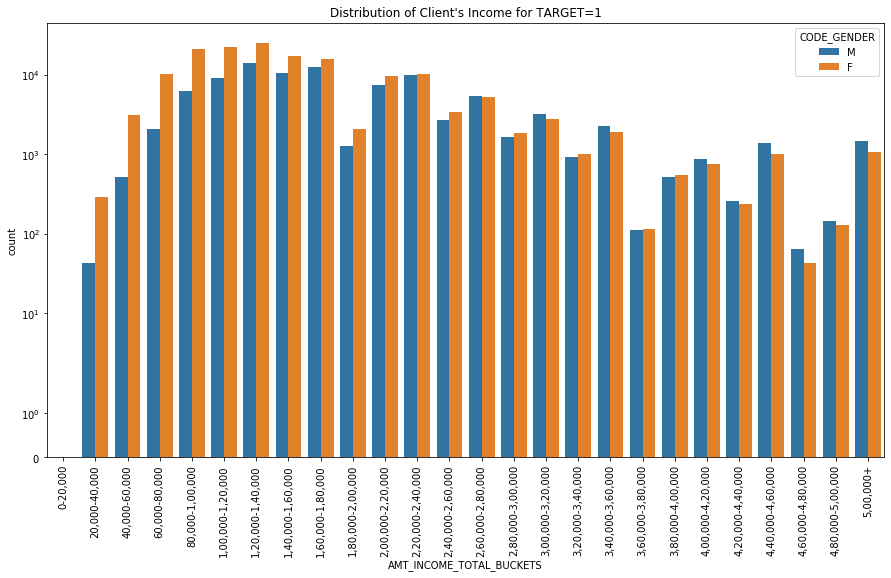

In [46]:
# Countplot of Client's Income for TARGET=1

fig_dims = (15,8)
fig, ax = plt.subplots(figsize = fig_dims)

plt.xticks(rotation = 90)
plt.yscale("symlog")
plt.title("Distribution of Client's Income for TARGET=1")
sns.countplot(data = target_1, x = inp0["AMT_INCOME_TOTAL_BUCKETS"], ax = ax, hue = inp0["CODE_GENDER"])
plt.show()

###### 1) In this, the females are a slightly higher than the males and not as a huge difference that we had seen in TARGET=0 dataframe.
###### 2) Maximum people's income is between 1.2 - 1.4 lakhs and the least income is between 4.6 - 4.8 lakhs.

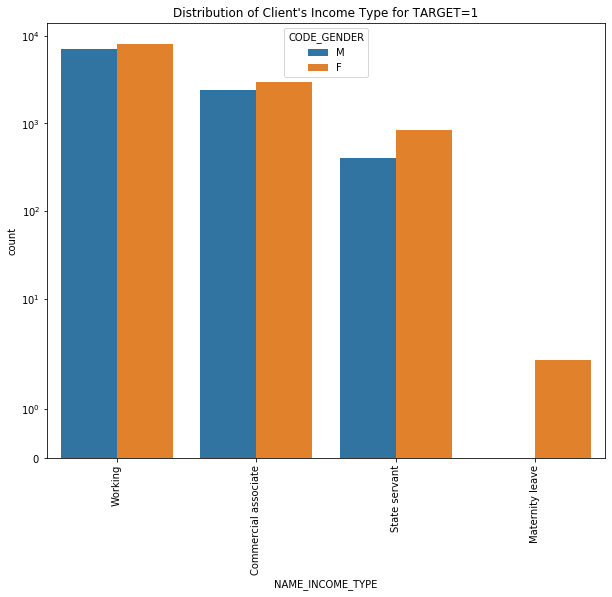

In [47]:
# Plotting "INCOME_TYPE" with "CODE_GENDER" for TARGET=1

fig_dims = (10,8)
fig, ax = plt.subplots(figsize = fig_dims)

plt.xticks(rotation = 90)
plt.yscale("symlog")
plt.title("Distribution of Client's Income Type for TARGET=1")
sns.countplot(target_1["NAME_INCOME_TYPE"], ax = ax, hue = inp0["CODE_GENDER"])
plt.show()

###### 1) In the above graph, we can say that Working, Commercial associate, State servant and Maternity leave people are the ones who are ######     earning.
###### 2) In these columns, female counts is higher than the male.
###### 3) In this, there is no income type student , pensioner and Business man, which means they don’t do any late payments.

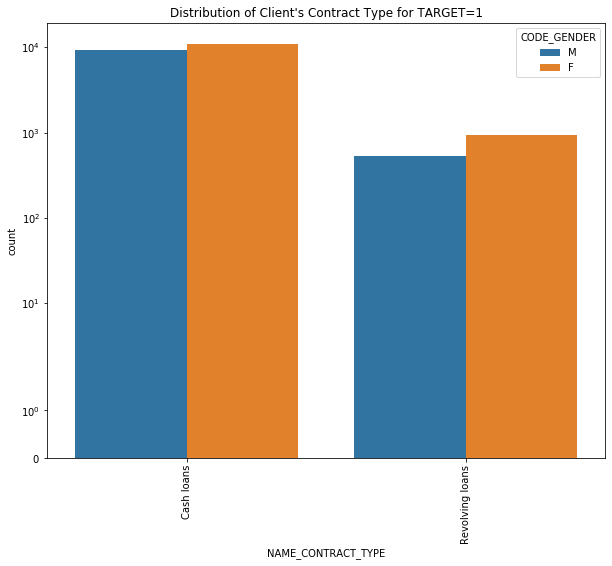

In [48]:
# Plotting the Contract_Type with respect to the Gender for TARGET=1

fig_dims = (10,8)
fig, ax = plt.subplots(figsize = fig_dims)

plt.xticks(rotation = 90)
plt.yscale("symlog")
plt.title("Distribution of Client's Contract Type for TARGET=1")
sns.countplot(target_1["NAME_CONTRACT_TYPE"], ax = ax, hue = inp0["CODE_GENDER"])
plt.show()

###### 1) In this, the count of Cash loans and Revolving in target=1 is reduced as compared to that of target=0, who are difficulty in paying loans ######     on time.
###### 2) In this, the females are the majority as compared to that of males.

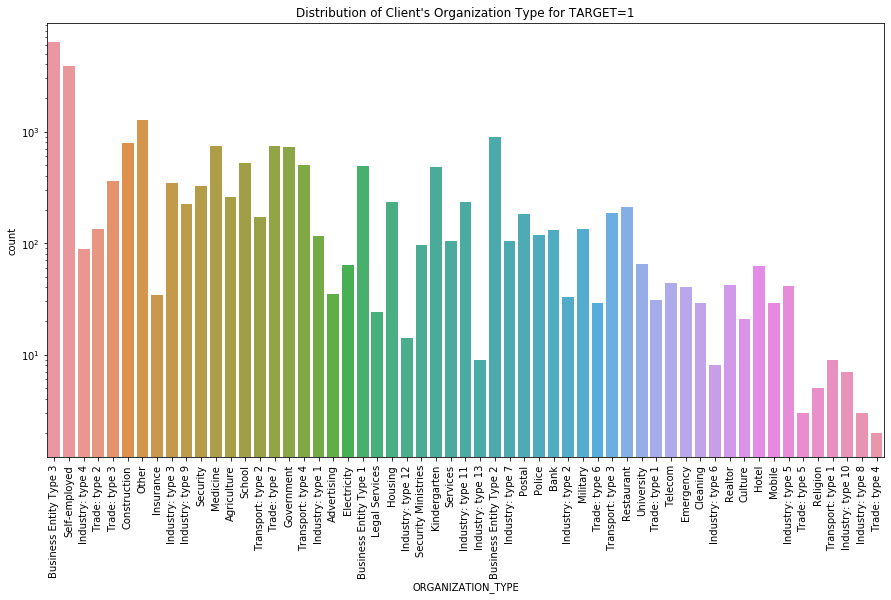

In [49]:
# Plotting the Organization_type for TARGET=1

fig_dims = (15,8)
fig, ax = plt.subplots(figsize = fig_dims)

plt.xticks(rotation = 90)
plt.yscale("log")
plt.title("Distribution of Client's Organization Type for TARGET=1")
sns.countplot(target_1["ORGANIZATION_TYPE"], ax = ax)
plt.show()

###### 1) Most number of people are working in Business Entity-Type3, Self employed, Other and Medicine categories.
###### 2) Least number of people are working in Industry: Type 8, Trade: Type 5, Trade: Type 4 and Industry: Type 13.
###### 3) It is almost same as that of target=0, except the count of people is reduced.

### Finding Correlation between the Numerical columns for TARGET=0 & TARGET=1

#### For TARGET = 0

In [50]:
# finding corr()

target0 = target_0.iloc[0:,2:]
target_0_corr = target0.corr()
target_0_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.009821,-0.018697,-0.007604,-0.030356,0.242462,0.063029,0.162889,-0.117740,-0.033043,-0.023032,-0.016797,-0.006945,-0.001564,0.010373,0.018417
AMT_INCOME_TOTAL,-0.009821,1.000000,0.326157,0.400753,0.169306,-0.045544,-0.030099,0.034513,-0.026462,0.055935,0.064869,0.129766,0.121289,-0.004264,-0.020260,-0.011237
AMT_CREDIT,-0.018697,0.326157,1.000000,0.762102,0.103881,-0.152660,-0.087510,-0.015178,-0.034918,0.040395,0.020978,0.050595,0.052026,-0.037530,-0.038523,-0.014839
AMT_ANNUITY,-0.007604,0.400753,0.762102,1.000000,0.122212,-0.091572,-0.052479,0.009816,-0.025995,0.034043,0.039752,0.076043,0.071621,-0.018915,-0.028977,-0.014273
REGION_POPULATION_RELATIVE,-0.030356,0.169306,0.103881,0.122212,1.000000,-0.041152,0.008660,-0.059706,-0.004017,0.174746,-0.003261,0.065825,0.092303,-0.053684,-0.049443,-0.017027
DAYS_BIRTH,0.242462,-0.045544,-0.152660,-0.091572,-0.041152,1.000000,0.352651,0.298988,0.108045,0.048605,0.058346,0.039300,0.014177,0.165509,0.112522,0.031125
DAYS_EMPLOYED,0.063029,-0.030099,-0.087510,-0.052479,0.008660,0.352651,1.000000,0.172082,0.086672,0.022190,0.056714,0.082434,0.063204,0.112018,0.125787,0.074660
DAYS_REGISTRATION,0.162889,0.034513,-0.015178,0.009816,-0.059706,0.298988,0.172082,1.000000,0.029891,-0.031515,0.020550,0.017589,0.009255,0.047237,0.055277,0.031351
DAYS_ID_PUBLISH,-0.117740,-0.026462,-0.034918,-0.025995,-0.004017,0.108045,0.086672,0.029891,1.000000,0.005436,0.026744,0.020967,0.008940,0.053424,0.033070,0.001766
HOUR_APPR_PROCESS_START,-0.033043,0.055935,0.040395,0.034043,0.174746,0.048605,0.022190,-0.031515,0.005436,1.000000,0.055043,0.072121,0.057692,0.010770,-0.001455,-0.005072


#### For TARGET = 1

In [51]:
# Finding corr()

target1 = target_1.iloc[0:,2:]
target_1_corr = target1.corr()
target_1_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,0.001872,-0.002074,0.015653,-0.032019,0.176563,0.032627,0.126411,-0.089861,-0.038923,-0.032465,-0.039498,-0.028031,-0.019278,-0.000876,0.016332
AMT_INCOME_TOTAL,0.001872,1.000000,0.036484,0.043358,0.008476,-0.007822,-0.000039,-0.003959,-0.008858,0.012520,0.006951,0.013245,0.012287,-0.003664,-0.006886,-0.004401
AMT_CREDIT,-0.002074,0.036484,1.000000,0.748708,0.069220,-0.189512,-0.106003,-0.033250,-0.062405,0.029054,0.020083,0.035695,0.035966,-0.035325,-0.041392,-0.017875
AMT_ANNUITY,0.015653,0.043358,0.748708,1.000000,0.074406,-0.090497,-0.049032,0.014302,-0.044289,0.022524,0.033311,0.063242,0.061609,-0.013834,-0.019728,-0.006806
REGION_POPULATION_RELATIVE,-0.032019,0.008476,0.069220,0.074406,1.000000,-0.049958,-0.015758,-0.055746,-0.011965,0.144049,-0.021946,0.025422,0.050773,-0.060398,-0.053718,-0.019017
DAYS_BIRTH,0.176563,-0.007822,-0.189512,-0.090497,-0.049958,1.000000,0.307018,0.241202,0.135519,0.034990,0.044508,0.022145,0.000483,0.142376,0.096474,0.012044
DAYS_EMPLOYED,0.032627,-0.000039,-0.106003,-0.049032,-0.015758,0.307018,1.000000,0.137454,0.096559,0.000092,0.059212,0.075389,0.054503,0.113374,0.134581,0.071026
DAYS_REGISTRATION,0.126411,-0.003959,-0.033250,0.014302,-0.055746,0.241202,0.137454,1.000000,0.049891,-0.048209,0.010866,0.004578,0.000767,0.028759,0.049148,0.028976
DAYS_ID_PUBLISH,-0.089861,-0.008858,-0.062405,-0.044289,-0.011965,0.135519,0.096559,0.049891,1.000000,0.008774,0.025320,0.013408,0.002667,0.047784,0.016251,-0.014871
HOUR_APPR_PROCESS_START,-0.038923,0.012520,0.029054,0.022524,0.144049,0.034990,0.000092,-0.048209,0.008774,1.000000,0.054819,0.067472,0.051844,0.005148,0.005293,0.003297


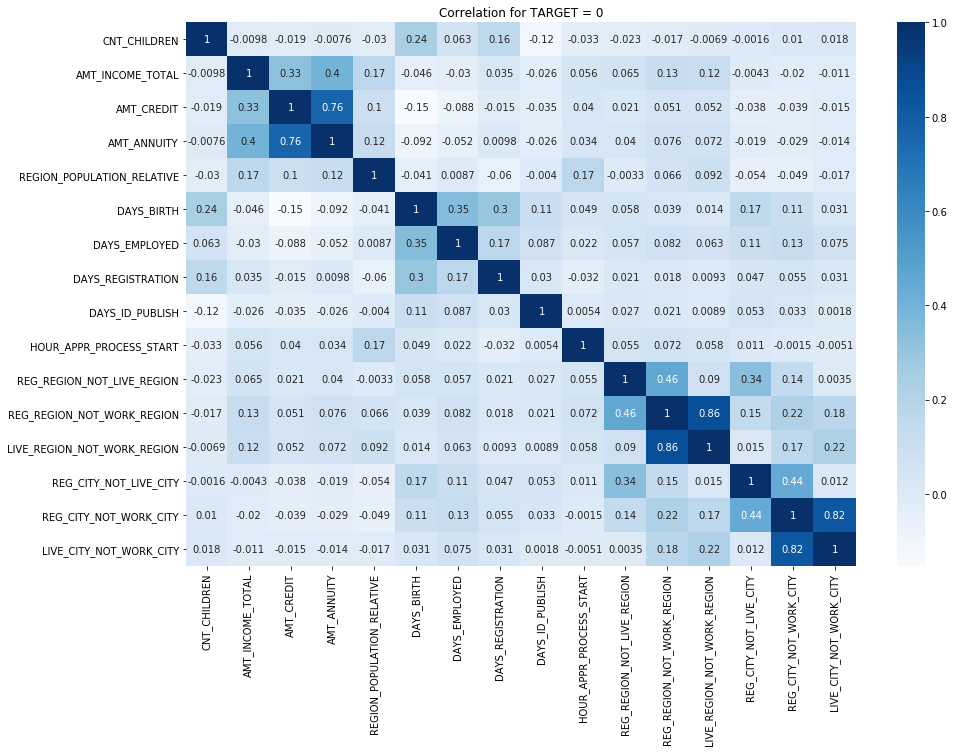

In [55]:
# Now plotting the above correlations for both Target = 0 & Target = 1 on heatmaps separately

# For TARGET = 0

plt.figure(figsize = (15,10))
plt.title("Correlation for TARGET = 0")
sns.heatmap(target_0_corr, cmap = "Blues", annot = True)
plt.show()

###### From the above heatmap, we can say that - 
###### 1) AMT_CREDIT is inversely proportional to the DAYS_BIRTH.
###### 2) AMT_CREDIT is inversely proportional to the number of children the client has, i.e. CNT_CHIDREN.
###### 3) AMT_INCOME_TOTAL is inversely proportional to the number of children the client has, i.e. CNT_CHILDREN.

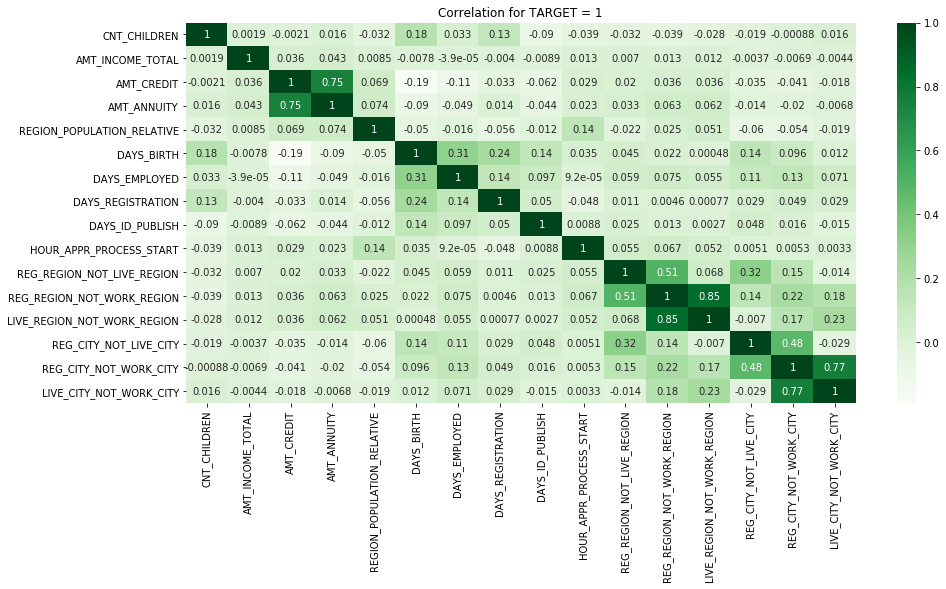

In [56]:
# For TARGET = 1

plt.figure(figsize = (15,7))
plt.title("Correlation for TARGET = 1")
sns.heatmap(target_1_corr, cmap = "Greens", annot = True)
plt.show()

###### The above heat map is same as that of TARGET=0 heatmap had, but there are some observation that are different - 
###### 1) The client's permanent address (REG_REGION_NOT_LIVE_REGION) does not match contact address are having less children (CNT_CHILDREN) and vice - versa.
###### 2) The client's permanent address (REG_REGION_NOT_LIVE_REGION) does not match work address are having less children (CNT_CHILDREN) and vice-versa.

### For TARGET = 0, finding outliers if any

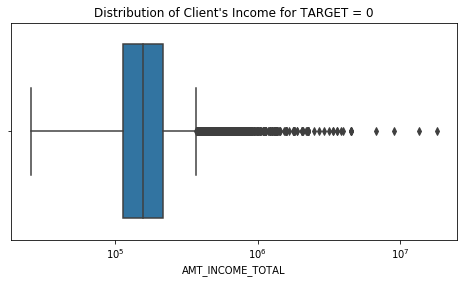

In [61]:
# Plotting a boxplot to find outliers for "AMT_INCOME_TOTAL" for TARGET=0

plt.figure(figsize = (8,4))
plt.xscale("symlog")
plt.title("Distribution of Client's Income for TARGET = 0")
sns.boxplot(target_0["AMT_INCOME_TOTAL"])
plt.show()

###### 1) There are some outliers that are spotted from the above graph.
###### 2) The 75th Quartile is smaller as compared to that of 25th Quartile range.

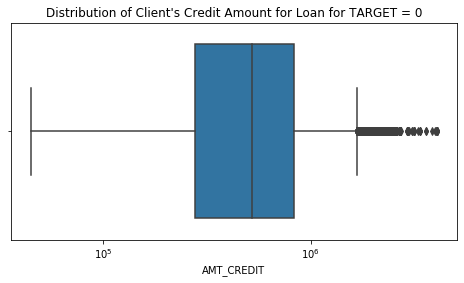

In [62]:
# Plotting a boxplot to find outliers for "AMT_CREDIT" for TARGET = 0

plt.figure(figsize = (8,4))
plt.xscale("symlog")
plt.title("Distribution of Client's Credit Amount for Loan for TARGET = 0")
sns.boxplot(target_0["AMT_CREDIT"])
plt.show()

###### 1) There are some outliers that are spotted from the above graph.
###### 2) The 75th Quartile is smaller as compared to that of 25th Quartile range.

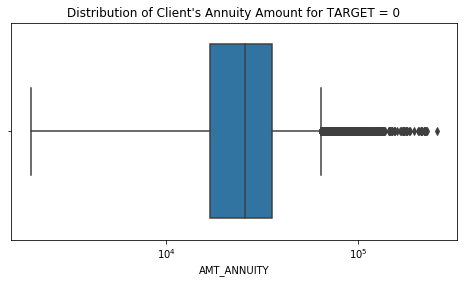

In [63]:
# Plotting a boxplot to find outliers for "AMT_ANNUITY" for TARGET = 0

plt.figure(figsize = (8,4))
plt.xscale("symlog")
plt.title("Distribution of Client's Annuity Amount for TARGET = 0")
sns.boxplot(target_0["AMT_ANNUITY"])
plt.show()

###### 1) There are some outliers that are seen from the above graph.
###### 2) In this, the 25th Quartile is bigger than the 75th Quartile range.

### For TARGET=1, finding outliers if any

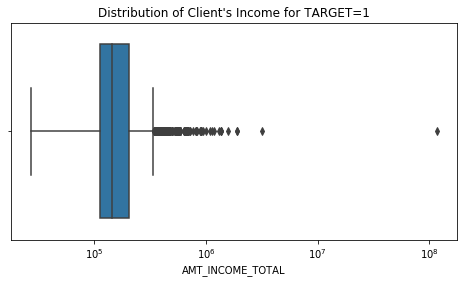

In [60]:
# Plotting a boxplot to find outliers for "AMT_INCOME_TOTAL" for TARGET = 1

plt.figure(figsize = (8,4))
plt.xscale("symlog")
plt.title("Distribution of Client's Income for TARGET = 1")
sns.boxplot(target_1["AMT_INCOME_TOTAL"])
plt.show()

###### 1) There are some outliers that are found from the above graph.
###### 2) In this, the 25th Quartile is bigger than the 75th Quartile range.

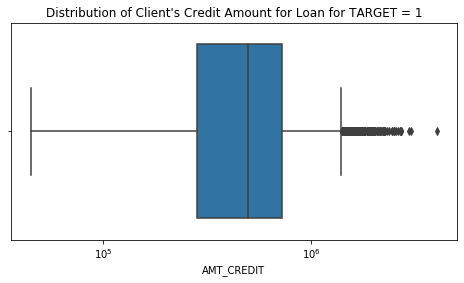

In [64]:
# Plotting a boxplot to find outliers for "AMT_CREDIT" for TARGET = 1

plt.figure(figsize = (8,4))
plt.xscale("symlog")
plt.title("Distribution of Client's Credit Amount for Loan for TARGET = 1")
sns.boxplot(target_1["AMT_CREDIT"])
plt.show()

###### 1) There are some outliers that are spotted from the above graph.
###### 2) The 75th Quartile is smaller as compared to that of 25th Quartile range.

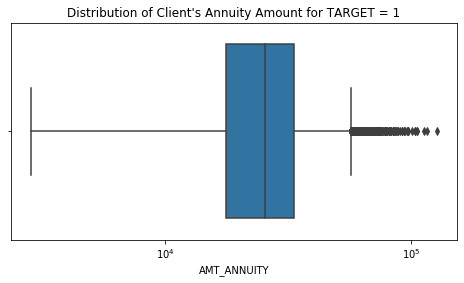

In [65]:
# Plotting a boxplot to find outliers for "AMT_ANNUITY" for TARGET = 1

plt.figure(figsize = (8,4))
plt.xscale("symlog")
plt.title("Distribution of Client's Annuity Amount for TARGET = 1")
sns.boxplot(target_1["AMT_ANNUITY"])
plt.show()

###### 1) There are some outliers that are found from the above graph.
###### 2) In this, the 25th Quartile is bigger than the 75th Quartile range.

### Bivariate Analysis for TARGET = 0

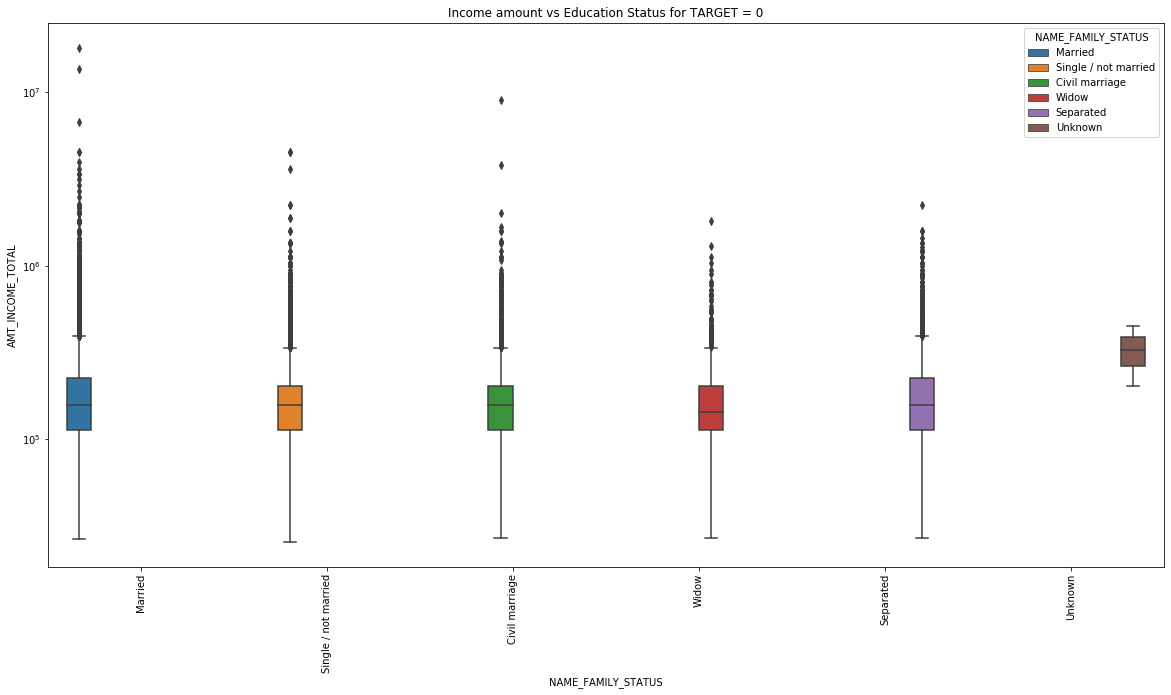

In [66]:
# Box plotting for Income amount vs Education Status for TARGET = 0

plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
plt.yscale("symlog")
plt.title("Income amount vs Education Status for TARGET = 0")
sns.boxplot(data = target_0, x = target_0["NAME_FAMILY_STATUS"], y = target_0["AMT_INCOME_TOTAL"], hue = target_0["NAME_FAMILY_STATUS"])
plt.show()

###### 1) From the above graph, Married status are having most outliers as compared to the other family status.
###### 2) Unknown status are very less in number and do not have any outliers.

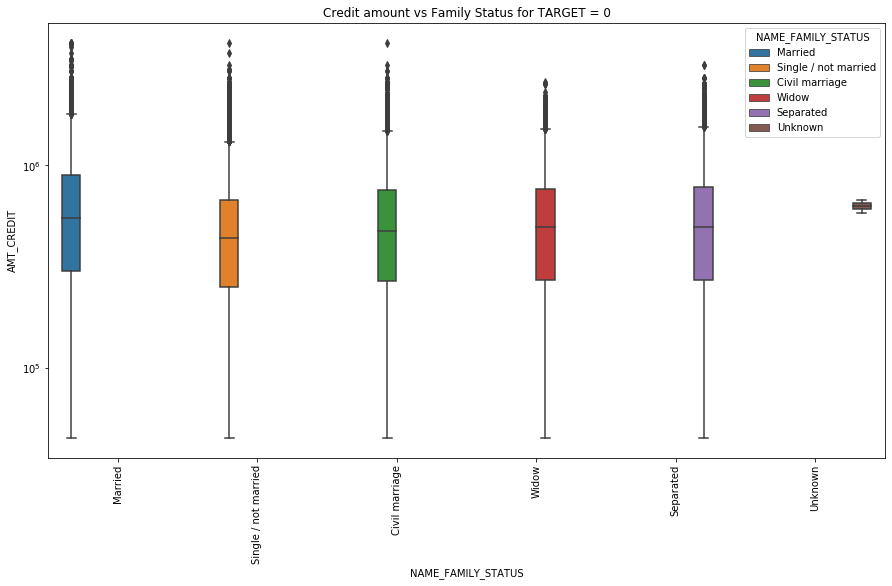

In [70]:
# Box plotting for Credit amount vs Family Status for TARGET = 0

plt.figure(figsize = (15,8))
plt.xticks(rotation = 90)
plt.yscale("symlog")
plt.title("Credit amount vs Family Status for TARGET = 0")
sns.boxplot(data = target_0, x = target_0["NAME_FAMILY_STATUS"], y = target_0["AMT_CREDIT"], hue = target_0["NAME_FAMILY_STATUS"])
plt.show()

###### 1) From the above graph, the Married status count lies in the particular range and does not have much outliers too.
###### 2) Single / not married have less count and have more outliers in them.

### Bivariate Analysis for TARGET = 1

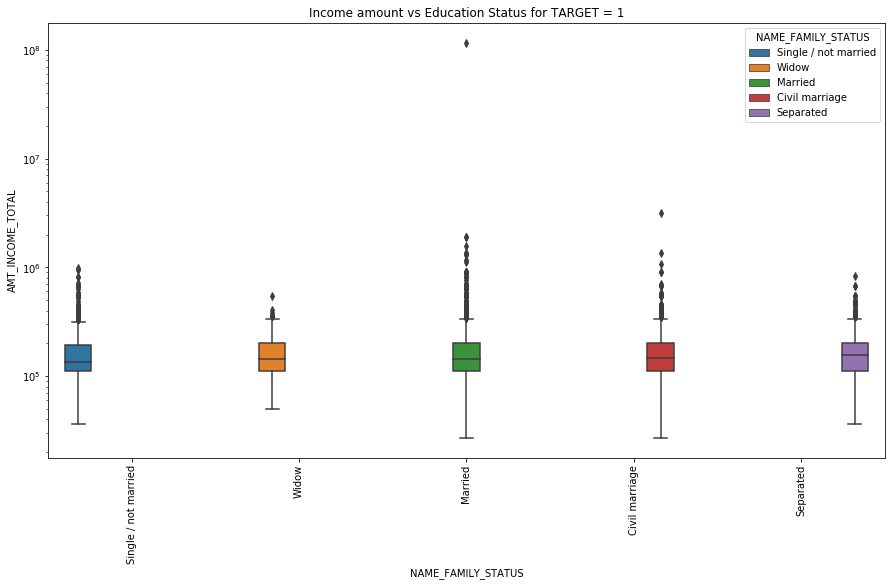

In [75]:
# Box plotting for Income amount vs Education Status for TARGET=1

plt.figure(figsize = (15,8))
plt.xticks(rotation = 90)
plt.yscale("log")
plt.title("Income amount vs Education Status for TARGET = 1")
sns.boxplot(data = target_1, x = target_1["NAME_FAMILY_STATUS"], y = target_1["AMT_INCOME_TOTAL"], hue = target_1["NAME_FAMILY_STATUS"])
plt.show()

###### 1) From the above graph, Married status have the maximum number of outliers as compared to that of other family status.
###### 2) There is only change from the TARGET = 1 graph, i.e., Unknown status is not there in the above graph.

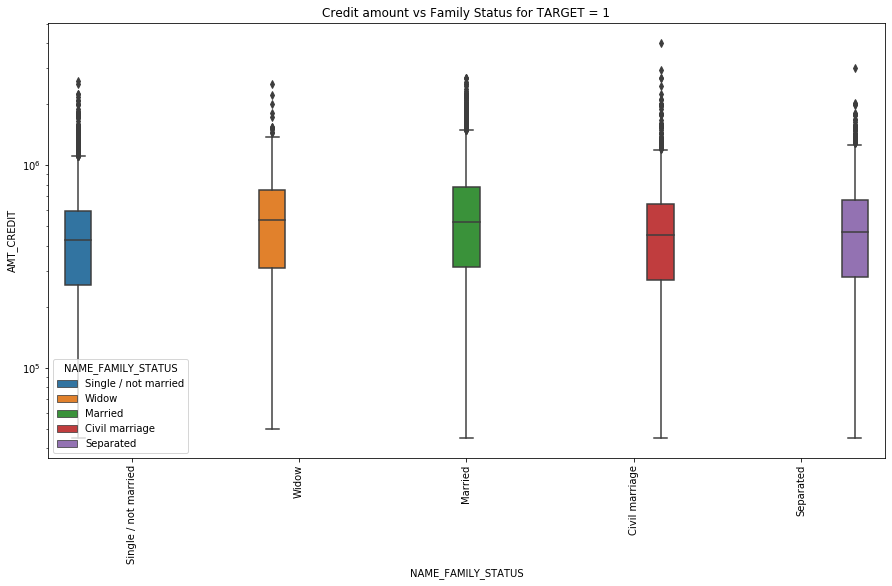

In [76]:
# Box plotting for Credit amount vs Family Status for TARGET = 1

plt.figure(figsize = (15,8))
plt.xticks(rotation = 90)
plt.yscale("log")
plt.title("Credit amount vs Family Status for TARGET = 1")
sns.boxplot(data = target_1, x = target_1["NAME_FAMILY_STATUS"], y = target_1["AMT_CREDIT"], hue = target_1["NAME_FAMILY_STATUS"])
plt.show()

###### 1) From the above graph, Civil marriage status have the maximum number of outliers as compared to that of other family status.
###### 2) There is only change from the TARGET = 1 graph, i.e., Unknown status is not there in the above graph.

### Reading the Previous Application Data provided

In [58]:
# Reading the "previous_application" csv file 

inp1 = pd.read_csv("previous_application.csv")

In [59]:
# Printing the head of inp1 dataframe

inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Shape of inp1 dataframe

inp1.shape

(1670214, 37)

In [61]:
# Checking which columns are categorical and which are continuous. 

inp1.nunique().sort_values()

NFLAG_INSURED_ON_APPROVAL            2
NFLAG_LAST_APPL_IN_DAY               2
FLAG_LAST_APPL_PER_CONTRACT          2
NAME_PRODUCT_TYPE                    3
NAME_CLIENT_TYPE                     4
NAME_CONTRACT_STATUS                 4
NAME_PAYMENT_TYPE                    4
NAME_CONTRACT_TYPE                   4
NAME_PORTFOLIO                       5
NAME_YIELD_GROUP                     5
WEEKDAY_APPR_PROCESS_START           7
NAME_TYPE_SUITE                      7
CHANNEL_TYPE                         8
CODE_REJECT_REASON                   9
NAME_SELLER_INDUSTRY                11
PRODUCT_COMBINATION                 17
HOUR_APPR_PROCESS_START             24
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_GOODS_CATEGORY                 28
CNT_PAYMENT                         49
RATE_INTEREST_PRIMARY              148
SELLERPLACE_AREA                  2097
DAYS_TERMINATION                  2830
DAYS_FIRST_DRAWING                2838
DAYS_LAST_DUE            

In [62]:
# Info of inp1 dataframe

inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [63]:
# Describe of inp1 dataframe

inp1.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [64]:
# Printing the datatype of inp1 dataframe

inp1.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [65]:
# Checking the number of null values in inp1 dataframe

inp1.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

# Cleaning the Missing Values

In [66]:
# Checking the no. of null value columns that are equal to or more than 50%

col = inp1.isnull().sum()
col = col[col.values>=(0.5*len(col))]
len(col)

15

In [67]:
# Dropping all those columns that had null values that were equal to or more than 50%

col = list(col[col.values>=0.5].index)
inp1.drop(labels = col, axis = 1, inplace = True)
len(col)

15

In [68]:
# Checking the shape of inp1 dataframe after dropping the columns

inp1.shape

(1670214, 22)

###### There are some rows that are having "XNA" and "XAP" values in them. So, we are dropping them.

In [69]:
# Dropping the rows containing "XNA" and "XAP" values

inp1 = inp1.drop(inp1[inp1["NAME_CASH_LOAN_PURPOSE"]=="XNA"].index)
inp1 = inp1.drop(inp1[inp1["NAME_CASH_LOAN_PURPOSE"]=="XAP"].index)

In [70]:
# Checking the shape of inp1 dataframe after dropping the rows

inp1.shape

(69635, 22)

In [71]:
# Now, merging the two dataframes, i.e. inp0 & inp1 into a new dataframe inp2

inp2 = pd.merge(left = inp0, right = inp1, on = "SK_ID_CURR", suffixes = "_y")
inp2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_TOTAL_BUCKETS,AMT_CREDIT_BUCKETS,SK_ID_PREV,NAME_CONTRACT_TYPEy,AMT_APPLICATION,AMT_CREDITy,WEEKDAY_APPR_PROCESS_STARTy,HOUR_APPR_PROCESS_STARTy,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-4799.0,-3015,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,"80,000-1,00,000","1,00,000-2,00,000",1390369,Cash loans,94500.0,109971.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,"2,80,000-3,00,000","6,00,000-7,00,000",1344613,Cash loans,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557.0,-3557,THURSDAY,10,0,0,0,1,1,0,Self-employed,"3,40,000-3,60,000","7,00,000-8,00,000",1077565,Cash loans,1350000.0,1487214.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236.0,-4292,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,"1,60,000-1,80,000","5,00,000-6,00,000",1223113,Cash loans,337500.0,407911.5,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236.0,-4292,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,"1,60,000-1,80,000","5,00,000-6,00,000",1529558,Cash loans,450000.0,555723.0,MONDAY,15,Y,1,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51414,456228,0,Cash loans,F,Y,N,0,540000.0,545040.0,35617.5,Commercial associate,Secondary / secondary special,Married,Rented apartment,0.032561,-12847,-328,-2531.0,-35,MONDAY,13,0,0,0,0,0,0,Business Entity Type 3,"5,00,000+","5,00,000-6,00,000",2406164,Cash loans,675000.0,721332.0,MONDAY,20,Y,1,Repairs,Refused,-637,XNA,LIMIT,Repeater,XNA,Cash,walk-in,Contact center,-1,XNA,middle
51415,456236,0,Cash loans,M,Y,Y,0,585000.0,1575000.0,43443.0,Working,Secondary / secondary special,Married,House / apartment,0.028663,-20965,-1618,-1764.0,-4410,FRIDAY,10,0,0,0,0,0,0,Self-employed,"5,00,000+","15,00,000+",1138749,Cash loans,135000.0,165226.5,WEDNESDAY,8,Y,1,Other,Refused,-1759,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
514

In [72]:
# Checking the shape of inp2 after merging

inp2.shape

(51419, 51)

In [73]:
# Renaming the columns after merging

inp2 = inp2.rename({"NAME_CONTRACT_TYPE_" : "NAME_CONTRACT_TYPE", "AMT_CREDIT_" : "AMT_CREDIT", "AMT_ANNUITY_" : "AMT_ANNUITY",
                    "WEEKDAY_APPR_PROCESS_START_" : "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START_" : "HOUR_APPR_PROCESS_START", 
                    "NAME_CONTRACT_TYPEy":"NAME_CONTRACT_TYPE_PREV", "AMT_CREDITy" : "AMT_CREDIT_PREV", "AMT_ANNUITYy" : "AMT_ANNUITY_PREV",
                    "WEEKDAY_APPR_PROCESS_STARTy" : "WEEKDAY_APPR_PROCESS_START_PREV", "HOUR_APPR_PROCESS_STARTy" : "HOUR_APPR_PROCESS_START_PREV"}, axis = 1)
inp2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_TOTAL_BUCKETS,AMT_CREDIT_BUCKETS,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,WEEKDAY_APPR_PROCESS_START_PREV,HOUR_APPR_PROCESS_START_PREV,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-4799.0,-3015,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,"80,000-1,00,000","1,00,000-2,00,000",1390369,Cash loans,94500.0,109971.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,"2,80,000-3,00,000","6,00,000-7,00,000",1344613,Cash loans,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557.0,-3557,THURSDAY,10,0,0,0,1,1,0,Self-employed,"3,40,000-3,60,000","7,00,000-8,00,000",1077565,Cash loans,1350000.0,1487214.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236.0,-4292,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,"1,60,000-1,80,000","5,00,000-6,00,000",1223113,Cash loans,337500.0,407911.5,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236.0,-4292,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,"1,60,000-1,80,000","5,00,000-6,00,000",1529558,Cash loans,450000.0,555723.0,MONDAY,15,Y,1,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51414,456228,0,Cash loans,F,Y,N,0,540000.0,545040.0,35617.5,Commercial associate,Secondary / secondary special,Married,Rented apartment,0.032561,-12847,-328,-2531.0,-35,MONDAY,13,0,0,0,0,0,0,Business Entity Type 3,"5,00,000+","5,00,000-6,00,000",2406164,Cash loans,675000.0,721332.0,MONDAY,20,Y,1,Repairs,Refused,-637,XNA,LIMIT,Repeater,XNA,Cash,walk-in,Contact center,-1,XNA,middle
51415,456236,0,Cash loans,M,Y,Y,0,585000.0,1575000.0,43443.0,Working,Secondary / secondary special,Married,House / apartment,0.028663,-20965,-1618,-1764.0,-4410,FRIDAY,10,0,0,0,0,0,0,Self-employed,"5,00,000+","15,00,000+",1138749,Cash loans,135000.0,165226.5,WEDNESDAY,8,Y,1,Other,Refused,-1759,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,

In [74]:
# Dropping the columns that are not needed

inp2.drop(["SK_ID_CURR", "WEEKDAY_APPR_PROCESS_START", "HOUR_APPR_PROCESS_START", "REG_REGION_NOT_LIVE_REGION", 
           "REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY",
           "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", "WEEKDAY_APPR_PROCESS_START_PREV",
           "HOUR_APPR_PROCESS_START_PREV", "FLAG_LAST_APPL_PER_CONTRACT", "NFLAG_LAST_APPL_IN_DAY"], axis = 1, inplace = True)

In [75]:
# Checking the shape of inp2 dataframe after dropping the columns

inp2.shape

(51419, 38)

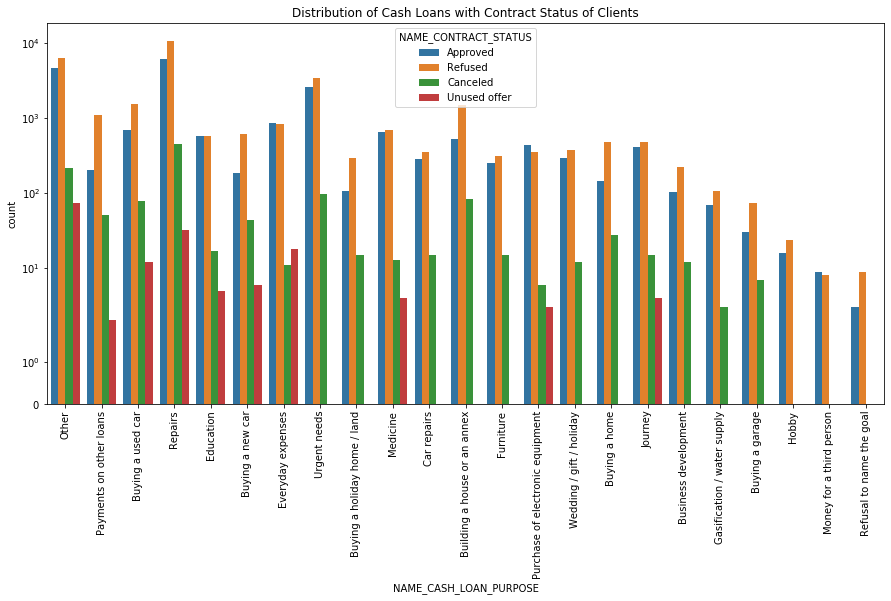

In [79]:
# Countplot of Cash Loans with Contract Status of Clients

fig_dims = (15,7)
fig, ax = plt.subplots(figsize = fig_dims)

plt.xticks(rotation = 90)
plt.yscale("symlog")
plt.title("Distribution of Cash Loans with Contract Status of Clients")
sns.countplot(inp2["NAME_CASH_LOAN_PURPOSE"], ax = ax, hue = inp2["NAME_CONTRACT_STATUS"])
plt.show()

###### 1) From the above graph, we can say that the loans are majorly refused by the bank to give it to the clients.
###### 2) The loans that are most refused are from the Repairs section.
###### 3) In Education section, we can see almost equal number of loans are being approved and refused.

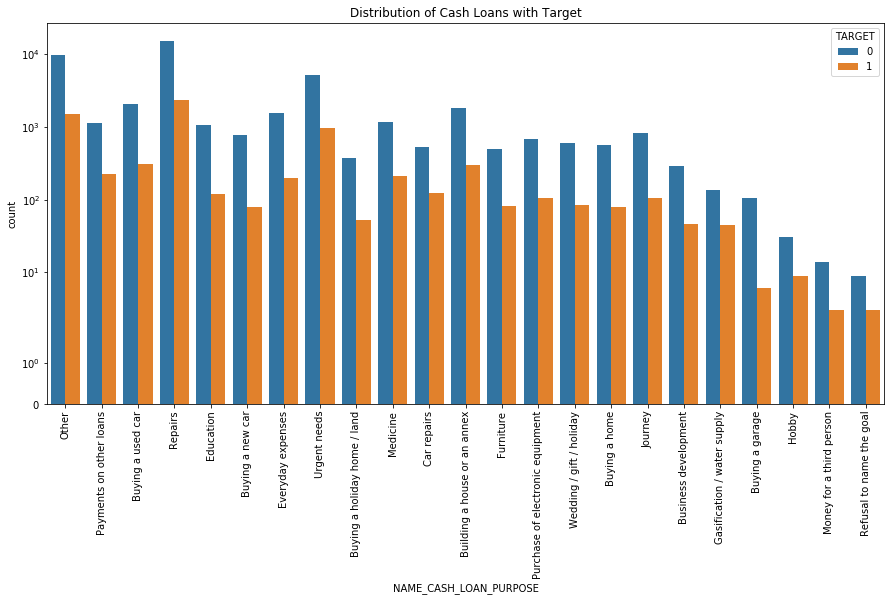

In [78]:
# Countplot of Cash Loans with Target

fig_dims = (15,7)
fig, ax = plt.subplots(figsize = fig_dims)

plt.xticks(rotation = 90)
plt.yscale("symlog")
plt.title("Distribution of Cash Loans with Target")
sns.countplot(inp2["NAME_CASH_LOAN_PURPOSE"], ax = ax, hue = inp2["TARGET"])
plt.show()

###### 1) From the above graph, we can say that the Repairs section are having the least difficulty in paying the loans.
###### 2) In majority of all the sections, they are not having any difficulties in paying the loans. 

### Bivariate Analysis for Inp2 Dataframe

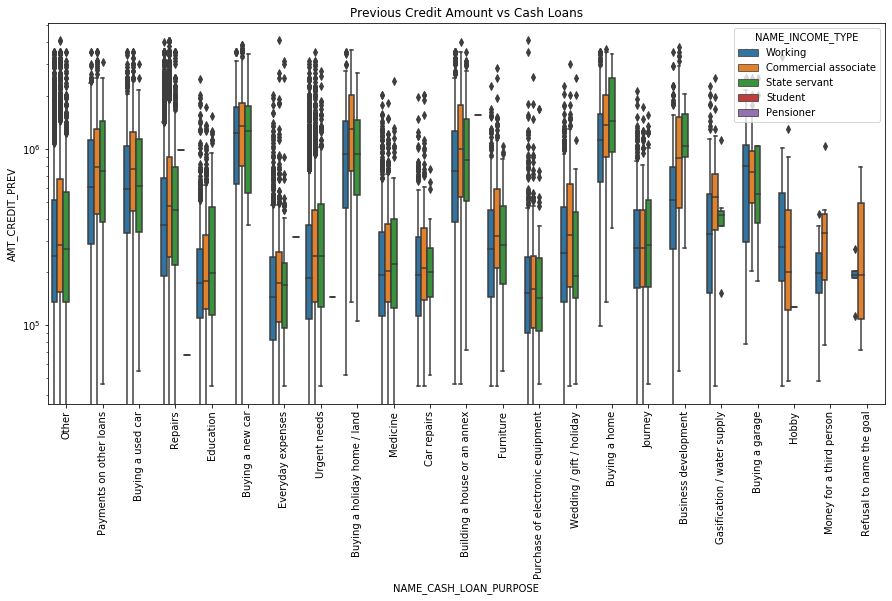

In [80]:
# Plotting for Previous Credit Amount vs Cash Loans

plt.figure(figsize = (15,7))
plt.xticks(rotation = 90)
plt.yscale("log")
sns.boxplot(data = inp2, x = inp2["NAME_CASH_LOAN_PURPOSE"], y = inp2["AMT_CREDIT_PREV"], hue = inp2["NAME_INCOME_TYPE"])
plt.title("Previous Credit Amount vs Cash Loans")
plt.show()

###### 1) From the above graph, we can say that Buying a new car, Buying a holiday home / Land, Buying a home are the categories that are having                       maximum previous Credit Amount of the loan.
###### 2) Everyday expenses and Purchase of electronic equipment are the categories that are having least previous Credit Amount of the loan.

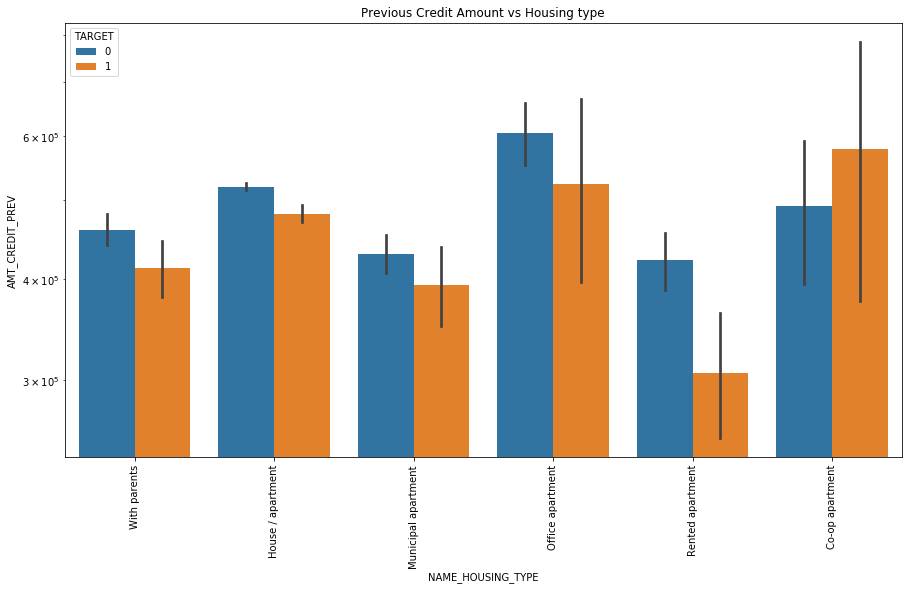

In [25]:
# Plotting for Previous Credit Amount vs Housing type 

plt.figure(figsize = (15,8))
plt.xticks(rotation = 90)
plt.yscale("log")
sns.barplot(data = inp2, x = inp2["NAME_HOUSING_TYPE"], y = inp2["AMT_CREDIT_PREV"], hue = inp2["TARGET"])
plt.title("Previous Credit Amount vs Housing type")
plt.show()

###### 1) From the above graph, we can say that Office apartment is having highest previous Credit Amount and are also able to pay the loans without any difficulty.
###### 2) Municipal apartment is having the least previous Credit Amount.
###### 3) Co-op apartment is having maximum difficulty as compared to the other Housing Types in paying the loans. 

# CONCLUSION

###### 1) Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.
###### 2) Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.
###### 3) Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.